<a href="https://colab.research.google.com/github/urvog/houseprice/blob/main/Unidad_II_Tema_2_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unidad II. Tema 2 Regresión Lineal
##Predicción de precio de Casas
<img src="https://www.neuraldojo.org/media/houseprice.gif"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="80%"/>

### El Problema
Los mercados inmobiliarios, como el nuestro, presentan una oportunidad interesante para que los analistas de datos analicen y predigan hacia dónde se están moviendo los precios de las propiedades. La predicción de los precios de las propiedades es cada vez más importante y beneficiosa. Los precios de las propiedades son un buen indicador tanto de la condición general del mercado como de la salud económica de un país. Teniendo en cuenta los datos proporcionados, estamos discutiendo un gran conjunto de registros de ventas de propiedades almacenados en un formato desconocido y con problemas de calidad de datos desconocidos.

Dataset Kaggle: https://www.kaggle.com/shree1992/housedata



In [1]:
#importamos las libreias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


## 1.- Importamos los datos

In [2]:
#Importamos el Dataset
!wget https://www.neuraldojo.org/media/houseprice/archive.zip
!unzip archive.zip

--2022-02-24 14:51:24--  https://www.neuraldojo.org/media/houseprice/archive.zip
Resolving www.neuraldojo.org (www.neuraldojo.org)... 143.95.32.198
Connecting to www.neuraldojo.org (www.neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 442471 (432K) [application/zip]
Saving to: ‘archive.zip.10’

archive.zip.10      100%[===================>] 432.10K  --.-KB/s    in 0.1s    

2022-02-24 14:51:27 (3.61 MB/s) - ‘archive.zip.10’ saved [442471/442471]

Archive:  archive.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


## 2.- Analisis Exploratorio (EDA)

In [3]:
df_house = pd.read_csv('data.csv')

In [4]:
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df_house.shape

(4600, 18)

In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
#Verificamos si no tenemos nulos
df_house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [9]:
#Seleccionamos las caracteristicas relevantes para nuestro modelo
columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']
df_house = df_house[columns]

In [10]:
df_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


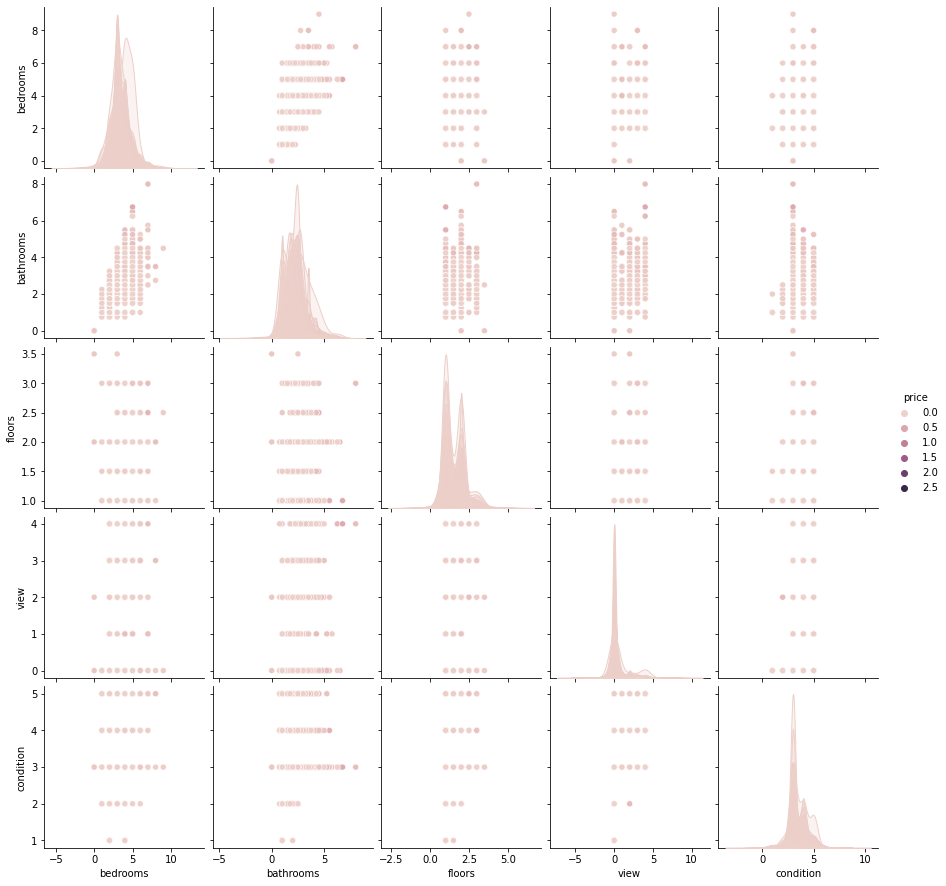

In [11]:
sns.pairplot(data = df_house[['price','bedrooms','bathrooms','floors','view','condition']], hue = 'price')

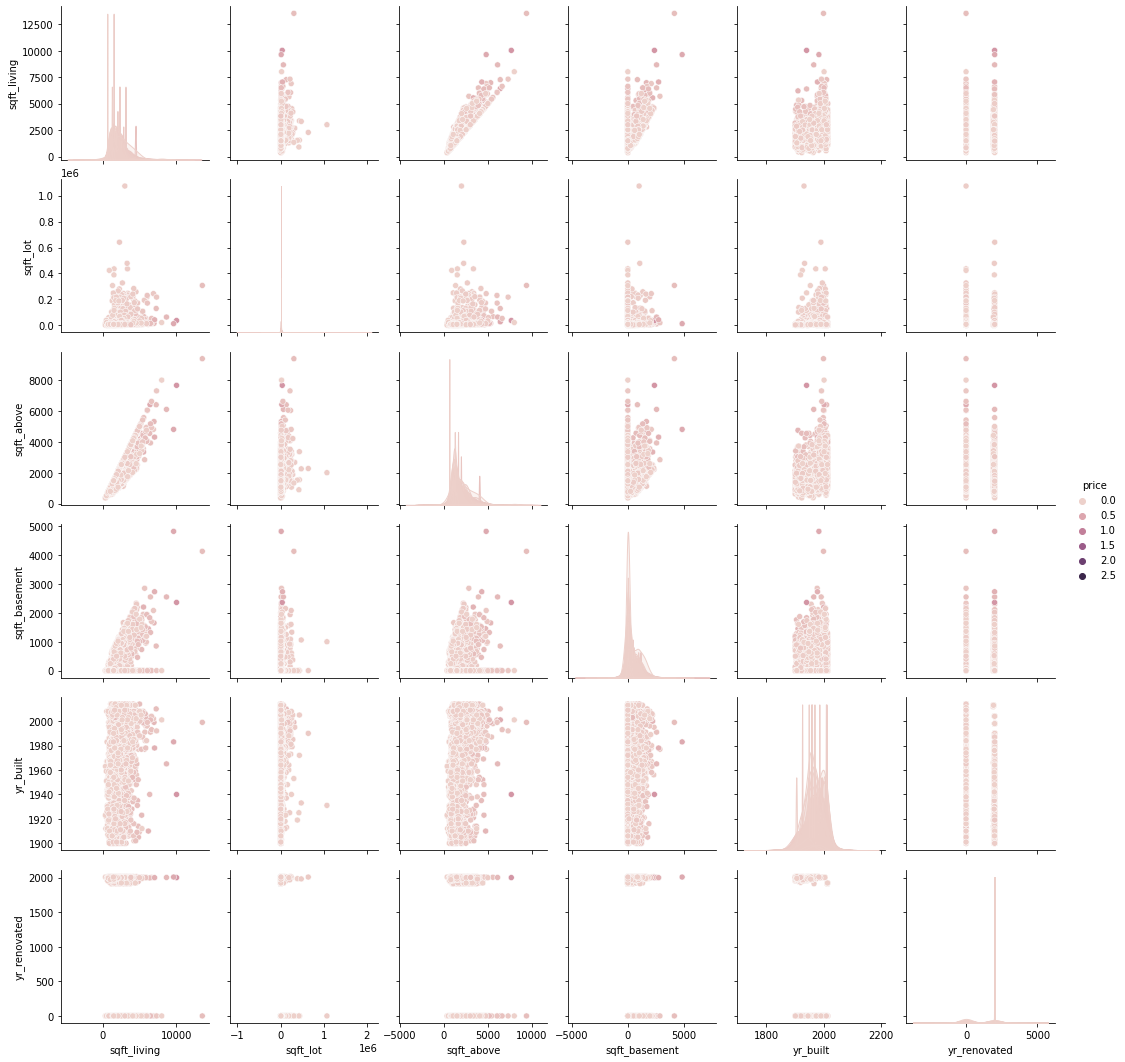

In [12]:
sns.pairplot(data = df_house[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']], hue = 'price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


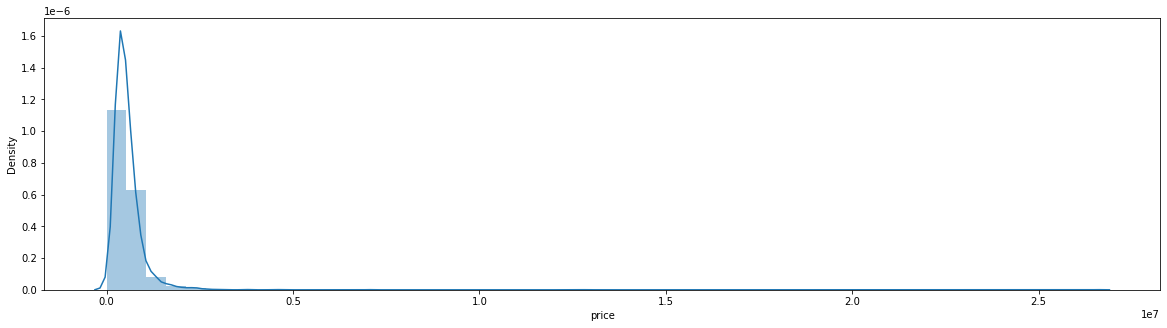

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(df_house['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


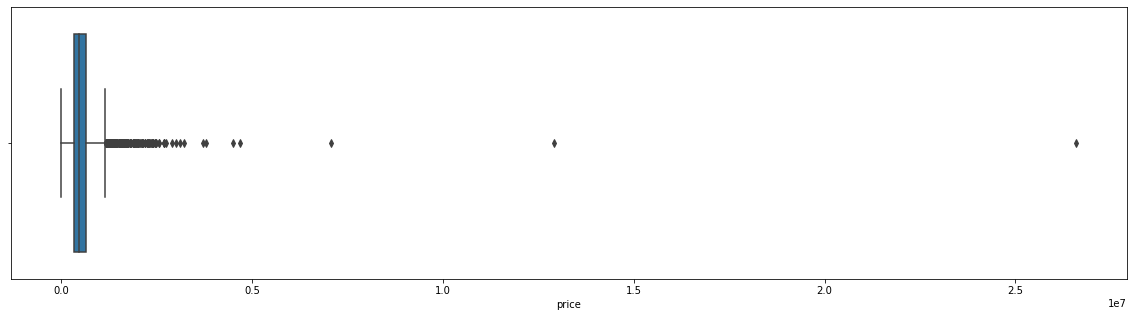

In [14]:
plt.figure(figsize=(20,5))

sns.boxplot(df_house['price'])

Media, Mediana y Moda

<img src="https://www.neuraldojo.org/media/media-moda-mediana-datos-agrupados-y-no-agrupados.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="50%"/>


### Eliminamos outliers

In [15]:
print("Mean:", df_house['price'].mean())
print("Mean:", df_house['price'].median())

Mean: 551962.9884732141
Mean: 460943.46153850004


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


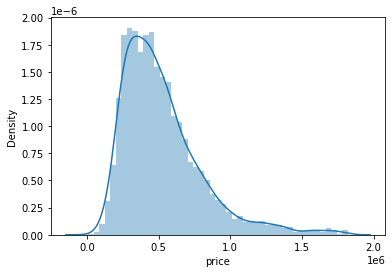

In [69]:
sns.distplot(df_house[(df_house['price']>0)&(df_house['price']<df_house['price'].median()*4)]['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


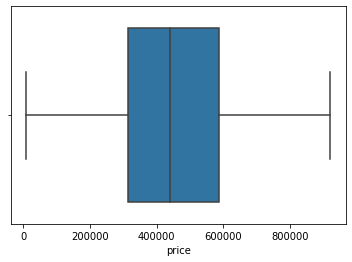

In [70]:
df_house_final = df_house[(df_house['price']>0)&(df_house['price']<df_house['price'].median()*2)]
sns.boxplot(df_house_final['price'])

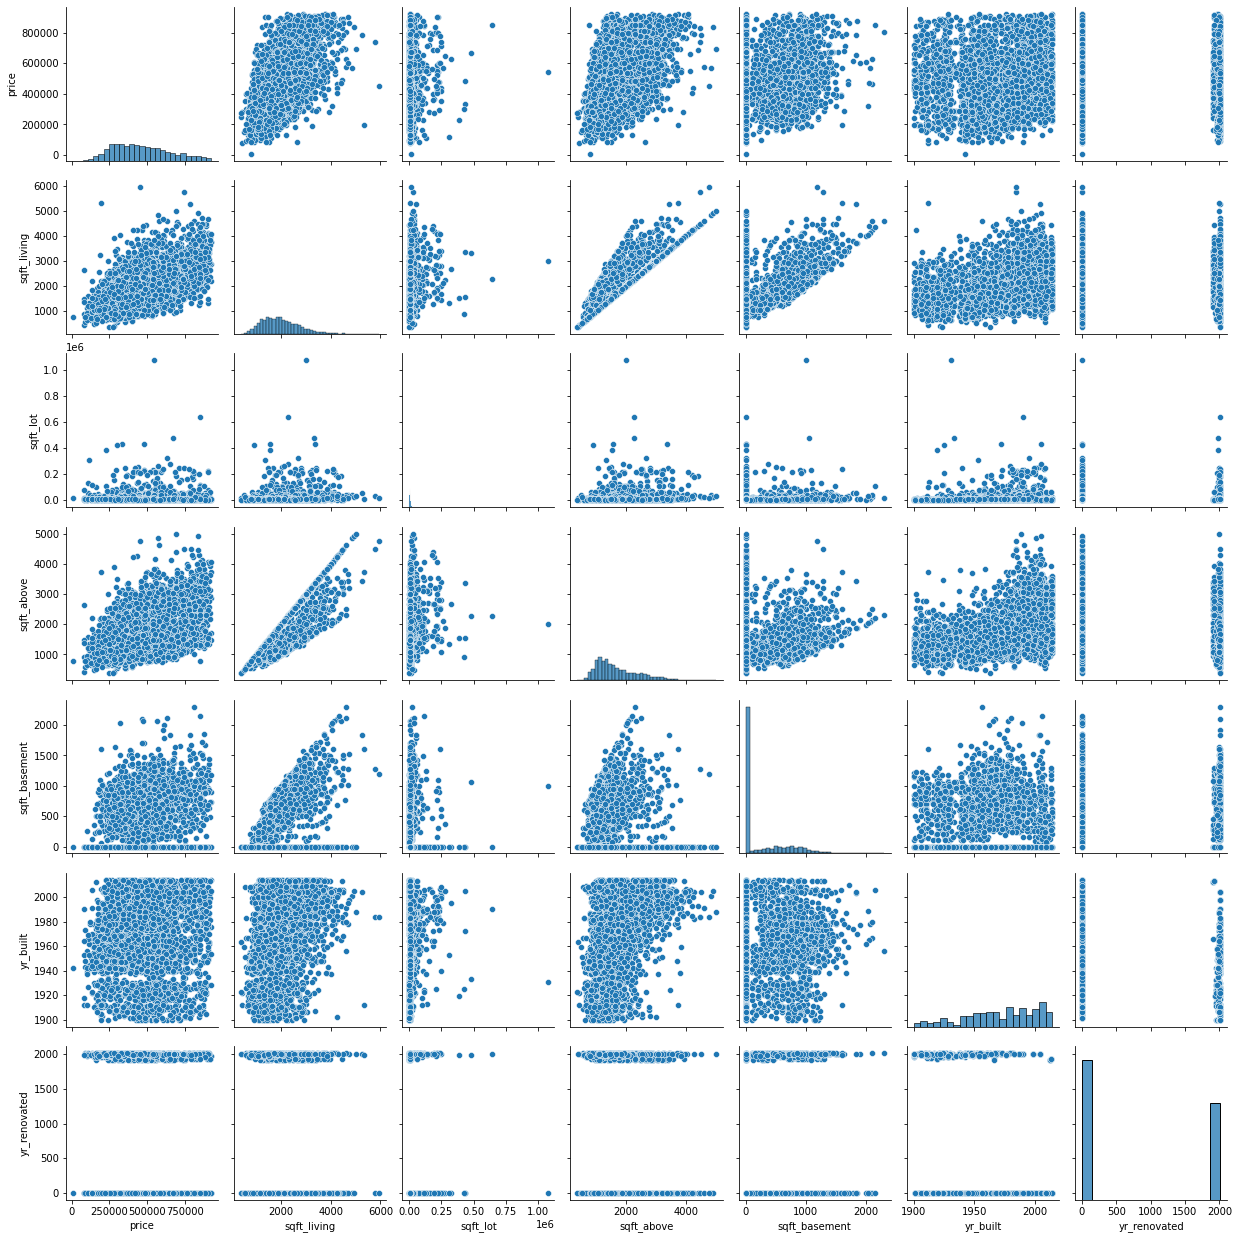

In [71]:
#ploteamos nuevamente con los datos finales
sns.pairplot(data = df_house_final[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']],diag_kind="hist")

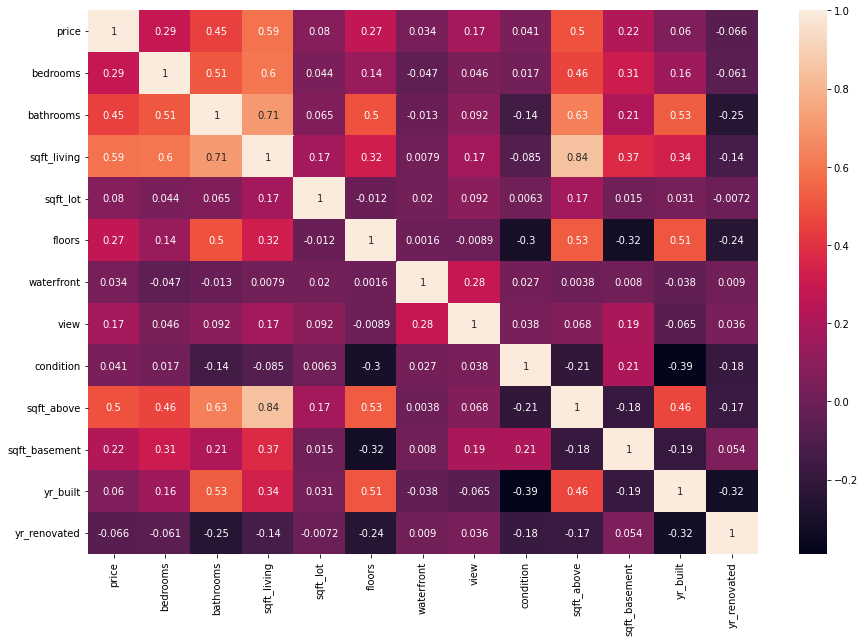

In [73]:
#Verificamos la correlacion de nuestros atributos
plt.figure(figsize=(15,10))
sns.heatmap(df_house_final.corr(), annot = True)

### Division datos entrenamiento, validaction y test

In [74]:
#Dividimos nuestros datos para entrenar el modelo (Train, Validation) y para Test
df_house_ = df_house_final.sample(frac= .75)
test = df_house_final.drop(df_house_.index)

In [75]:
#Dividimos nuesros datos train, validation and test
X = df_house_.iloc[:,1:]
y = df_house_['price']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)
X_test = test.iloc[:,1:]
y_test = test['price']

## 3.- Modelo ML

In [76]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train,y_train)
reg.score(X_valid,y_valid)

0.4019708647793122

In [77]:
print("Coef:",reg.coef_)
print("Intercept:",reg.intercept_)

Coef: [-2.03748782e+04  4.24985401e+04  8.99655127e+01 -9.62806088e-02
  5.13062815e+04  3.92009111e+04  1.59704606e+04  1.43188840e+04
  4.96292150e+01  4.03362978e+01 -1.57925116e+03  5.63101928e-01]
Intercept: 3154376.090722314


## 4.- Evaluación de Modelo

In [78]:
from sklearn.metrics import mean_squared_error

#For validation values
mse = mean_squared_error(y_valid, reg.predict(X_valid))
rmse = np.sqrt(mse)

print("Validation MSE:",mse)
print("Validation RMSE:",rmse)

#For test values
mse = mean_squared_error(y_test, reg.predict(X_test))
rmse = np.sqrt(mse)

print("Test MSE:",mse)
print("Test RMSE:",rmse)

Validation MSE: 20287568271.382256
Validation RMSE: 142434.4349916208
Test MSE: 19458573787.29184
Test RMSE: 139493.9919397672


##5.- Predicciones

In [79]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
9,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010
10,3.0,1.75,1710,7320,1.0,0,0,3,1710,0,1948,1994


In [80]:
data_pred = reg.predict(X_test)
print(data_pred)

[376903.51372442 466508.37537108 430594.6528428  ... 295360.57763039
 520965.81837056 423892.18461369]


Text(0, 0.5, 'Prediction')

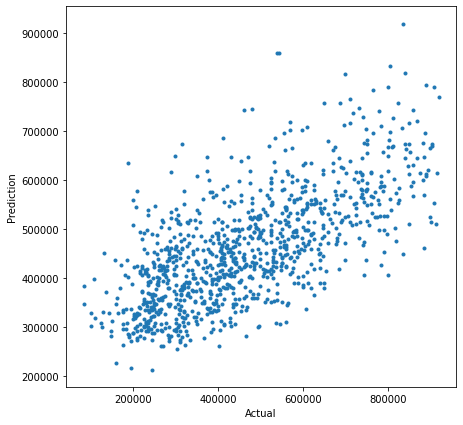

In [81]:
plt.figure(figsize=(7,7))
plt.plot(y_test,data_pred,'.')
plt.xlabel("Actual")
plt.ylabel("Prediction")


## 6.- Con Normalizacion

In [82]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
3045,3.0,2.50,2280,7417,2.0,0,0,3,2280,0,1998,2006
1033,3.0,1.50,1270,1443,3.0,0,0,3,1270,0,2007,0
2114,3.0,1.75,1230,7500,1.0,0,0,3,1230,0,1987,2000
4247,3.0,1.50,1550,4980,1.0,0,0,3,1080,470,1978,0
1379,3.0,3.00,2520,2152,1.5,0,0,3,1560,960,1925,2006


In [83]:
#Revisemos algunos valores maximos y minimos para entender las escalas de nuestros atributos
X.describe().T[['min','max']]

,min,max
bedrooms,1.00,9.00
bathrooms,0.75,5.25
sqft_living,370.00,5960.00
sqft_lot,681.00,1074218.00
floors,1.00,3.00
waterfront,0.00,1.00
view,0.00,4.00
condition,1.00,5.00
sqft_above,370.00,5010.00
sqft_basement,0.00,2150.00


In [84]:
X.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'], dtype=object)

In [85]:
#Utilizamos MinMaxScaler de Sklearn para transformar nuestros datos en valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
columns = X.columns.values
min_max = MinMaxScaler()
data_x = min_max.fit_transform(X)
X_norm = pd.DataFrame(data_x, columns=columns)

In [86]:
X_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.25,0.388889,0.341682,0.006275,0.50,0.0,0.0,0.5,0.411638,0.000000,0.859649,0.996028
1,0.25,0.166667,0.161002,0.000710,1.00,0.0,0.0,0.5,0.193966,0.000000,0.938596,0.000000
2,0.25,0.222222,0.153846,0.006352,0.00,0.0,0.0,0.5,0.185345,0.000000,0.763158,0.993049
3,0.25,0.166667,0.211091,0.004005,0.00,0.0,0.0,0.5,0.153017,0.218605,0.684211,0.000000
4,0.25,0.500000,0.384615,0.001370,0.25,0.0,0.0,0.5,0.256466,0.446512,0.219298,0.996028


In [87]:
data_test_x = min_max.fit_transform(X_test)
X_test_norm = pd.DataFrame(data_test_x, columns=columns)
X_test_norm.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.333333,0.15,0.210989,0.016723,0.2,0.0,0.0,0.50,0.210989,0.000000,0.482456,0.995531
1,0.333333,0.30,0.356044,0.016995,0.0,0.0,0.0,0.75,0.136264,0.434783,0.552632,0.000000
2,0.500000,0.35,0.342857,0.022673,0.0,0.0,0.0,0.75,0.167033,0.347826,0.666667,0.989076
3,0.500000,0.25,0.250549,0.012787,0.2,0.0,0.0,0.50,0.250549,0.000000,0.394737,0.998014
4,0.333333,0.20,0.292308,0.015362,0.0,0.0,0.0,0.50,0.292308,0.000000,0.421053,0.990070


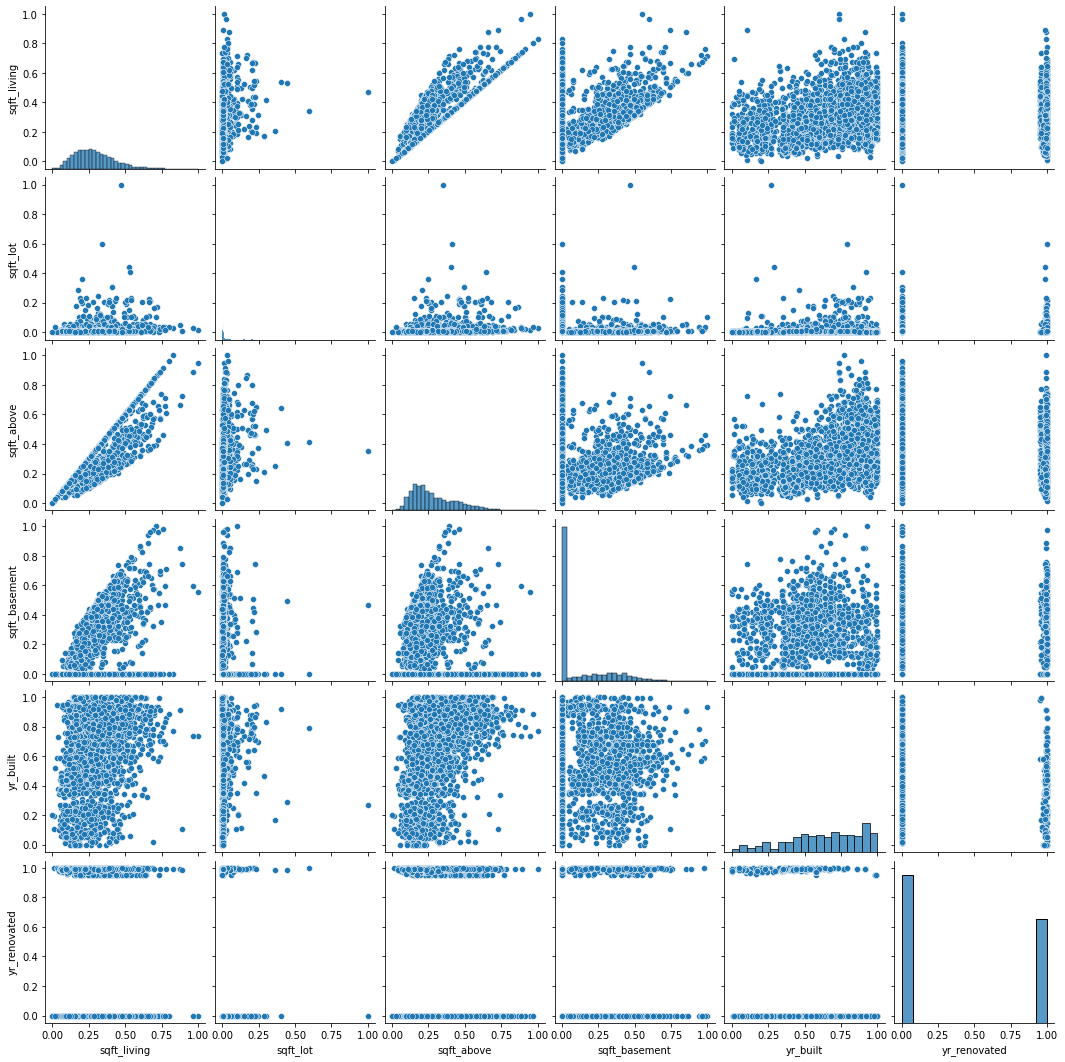

In [88]:
#ploteamos nuevamente con los datos finales
sns.pairplot(data = X_norm[['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated']],diag_kind="hist")

In [64]:
#feature selection
X_norm.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [89]:
#Eliminamos yr_built, yr_renovated
X_norm = X_norm.iloc[:,:-2]
X_test_norm = X_test_norm.iloc[:,:-2] 

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X_norm, y, random_state=0, test_size = 0.30)

reg_norm = LinearRegression().fit(X_train,y_train)
reg_norm.score(X_valid,y_valid)

0.35998777879756017

In [91]:
#For validation values
mse2 = mean_squared_error(y_valid, reg_norm.predict(X_valid))
rmse2 = np.sqrt(mse2)

print("Validation MSE Norm:",mse2)
print("Validation RMSE Norm:",rmse2)

#For test values
mse2 = mean_squared_error(y_test, reg_norm.predict(X_test_norm))
rmse2 = np.sqrt(mse2)

print("Test MSE Norm:",mse2)
print("Test RMSE Norm:",rmse2)

Validation MSE Norm: 21711804438.042923
Validation RMSE Norm: 147349.26005258024
Test MSE Norm: 20534002317.520523
Test RMSE Norm: 143296.9026794387


In [92]:
data_pred_norm = reg_norm.predict(X_test_norm)
print(data_pred_norm)

[354404.95342821 477863.31025508 448804.73738743 ... 319890.43963985
 561303.26515786 433142.13233973]


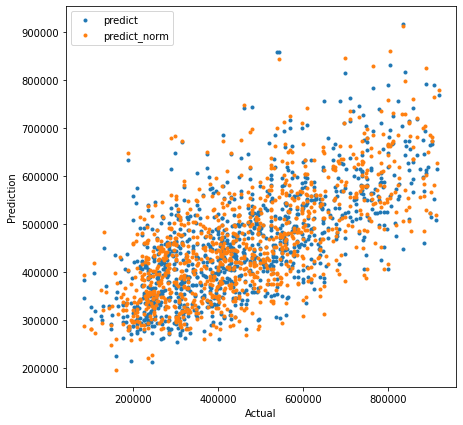

In [93]:
plt.figure(figsize=(7,7))
plt.plot(y_test,data_pred,'.', label = 'predict')
plt.plot(y_test,data_pred_norm,'.', label = 'predict_norm')
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.legend()